In [83]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.datasets import load_boston

In [84]:
boston = load_boston()

In [85]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [86]:
X = pd.DataFrame(data, columns = feature_names)

In [87]:
y = pd.DataFrame(target, columns = ['price'])

In [88]:
from sklearn.model_selection import train_test_split 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
X_test.shape, X_train.shape

((102, 13), (404, 13))

In [91]:
from sklearn.preprocessing import StandardScaler 

In [92]:
scaler = StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)

In [94]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [95]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [96]:
from sklearn.manifold import TSNE 

In [97]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [98]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [99]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


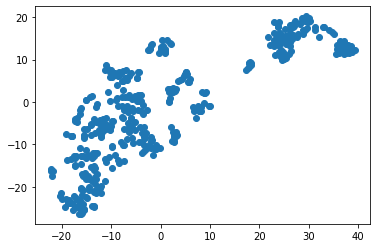

In [100]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,max_iter = 100, random_state = 42)

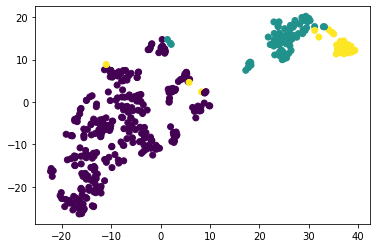

In [102]:
labels_train = kmeans.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [103]:
y_train.mean()

price    22.796535
dtype: float64

In [104]:
y_train[labels_train == 0].mean(), y_train[labels_train == 1].mean(), y_train[labels_train == 2].mean()

(price    25.168687
 dtype: float64,
 price    17.442105
 dtype: float64,
 price    13.196774
 dtype: float64)

In [105]:
X_train['CRIM'].mean() 

3.609124628712873

In [106]:
X_train.loc[labels_train == 0, 'CRIM'].mean() ,X_train.loc[labels_train == 1, 'CRIM'].mean() ,X_train.loc[labels_train == 2, 'CRIM'].mean() 

(0.40486282828282844, 11.745661842105266, 14.360380322580648)

In [117]:
X_test_labels = kmeans.predict(X_test_scaled)

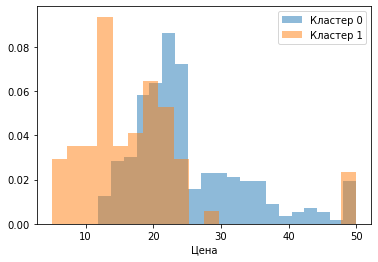

In [118]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

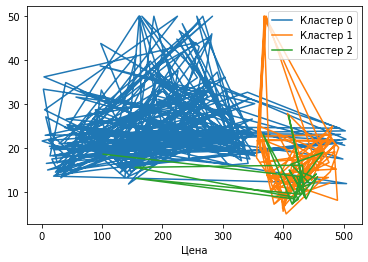

In [120]:
plt.plot(y_train[labels_train == 0])
plt.plot(y_train[labels_train == 1])
plt.plot(y_train[labels_train == 2])
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 3'])
plt.xlabel('Цена')

plt.show()

In [125]:
X_test.loc[labels_train == 0, 'CRIM'].mean() ,X_test.loc[labels_train == 1, 'CRIM'].mean(), X_test.loc[labels_train == 2, 'CRIM'].mean() 

IndexError: Boolean index has wrong length: 404 instead of 102

In [126]:
X_test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])